In [8]:
import matplotlib.pyplot as plt
import numpy as np
plt.close('all')


def naca4(number='0012', n=1000):
    
    """
    Plots the aerofoil for the given 4 digit NACA number string
    """

    m = float(number[0])/100.0
    p = float(number[1])/10.0
    t = float(number[2:])/100.0

    a0 = +0.2969
    a1 = -0.1260
    a2 = -0.3516
    a3 = +0.2843
    a4 = -0.1015

    # Make a vector of the x spacing
    x =  np.linspace(0, 1, n)

    # Get the thickness distribution
    yt = 5 * t * (a0*x**.5 + a1*x + a2*x**2 + a3*x**3 + a4*x**4)
    
    # Get the camber line
    yc = np.zeros(x.shape)
    if p > 0:
        yc[x <= p] = m / p**2 * (2 * p * x[x <= p] - x[x <= p] **2)
        yc[x > p] = m / (1 - p)**2 * ((1 - 2 * p) + 2 * p * x[x > p] - x[x > p]**2)

    # Get the gradient of the lines
    dyc_dx = np.zeros(x.shape)
    if p > 0:
        dyc_dx[x <= p] = 2 * m / p**2 * (p-x[x <= p])
        dyc_dx[x > p] = 2 * m / (1-p)**2 * (p-x[x > p])
    
    theta = np.arctan(dyc_dx)
        
    # Get the upper and lower surfaces
    yu = yc + yt * np.cos(theta)
    yl = yc - yt * np.cos(theta)
    
    xu = x - yt * np.sin(theta)
    xl = x + yt * np.sin(theta)
    
    # Put into Selig format
#     Y = np.concatenate((yu[::-1], yl))
#     X = np.concatenate((x[::-1], x))
    
    plt.figure()
    plt.plot(xu, yu, label="Upper Surface")
    plt.plot(xl, yl, label="Lower Surface")
    plt.plot(x, yc, label="Camber Line")
    plt.plot([x[0], x[-1]], [yc[0], yc[-1]], '--', label='Chord Line')
    plt.legend()
    plt.gca().set_aspect('equal')
#     plt.gca().axis('off')
    plt.title(f"Normalised aerofoil for NACA {number}")
    plt.gca().legend(bbox_to_anchor=(1.1, 1.05))
    return

<IPython.core.display.Javascript object>


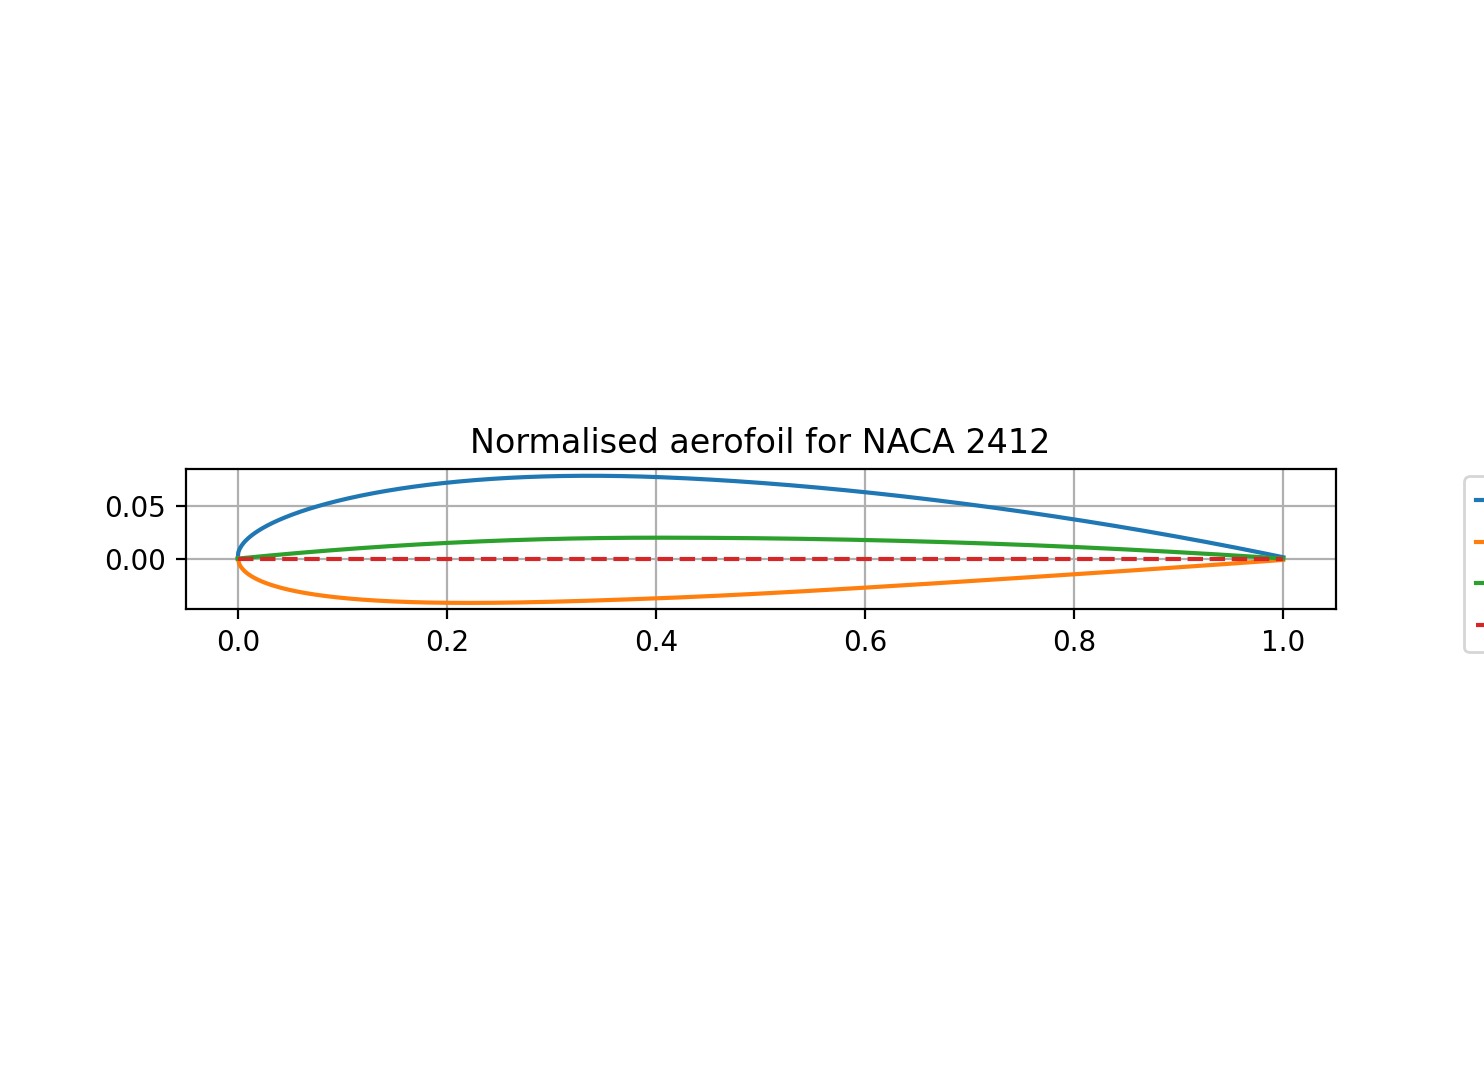

In [9]:
%matplotlib notebook
naca4('2412')
plt.grid(True)